In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
fs = 22050  # Sampling rate
t = np.linspace(0, 1, fs, endpoint=False)

# crackle simulation
signal = 0.6 * np.sin(2 * np.pi * 200 * t) \
       + 0.3 * np.sin(2 * np.pi * 400 * t)

signal[2000:2100] += np.random.normal(0, 1, 100)


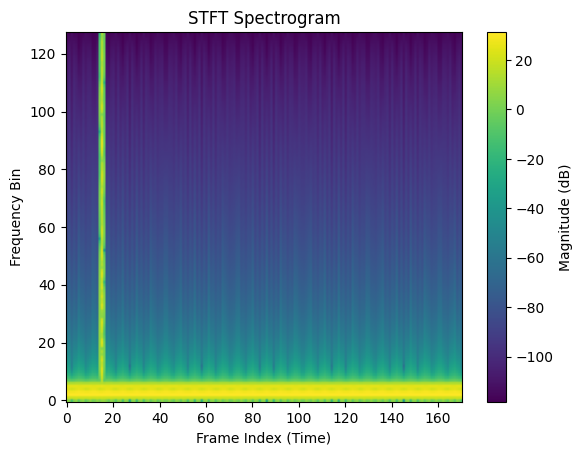

In [ ]:
window_size = 256
hop_length = 128
window = np.hanning(window_size)

frames = []
for i in range(0, len(signal) - window_size, hop_length):
    frame = signal[i:i+window_size] * window
    spectrum = np.abs(np.fft.fft(frame))[:window_size // 2]
    frames.append(spectrum)

stft_matrix = np.array(frames).T

plt.figure()
plt.imshow(20 * np.log10(stft_matrix + 1e-6),
           aspect='auto',
           origin='lower')
plt.title("STFT Spectrogram")
plt.xlabel("Frame Index (Time)")
plt.ylabel("Frequency Bin")
plt.colorbar(label="Magnitude (dB)")
plt.show()

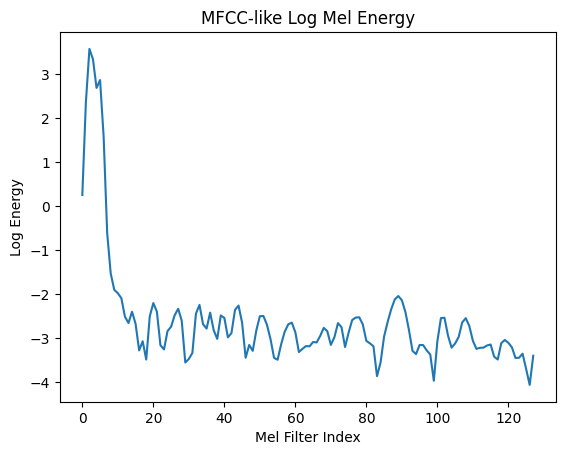

In [ ]:
mel_energy = np.log(np.mean(stft_matrix, axis=1) + 1e-6)

plt.figure()
plt.plot(mel_energy)
plt.title("MFCC-like Log Mel Energy")
plt.xlabel("Mel Filter Index")
plt.ylabel("Log Energy")
plt.show()

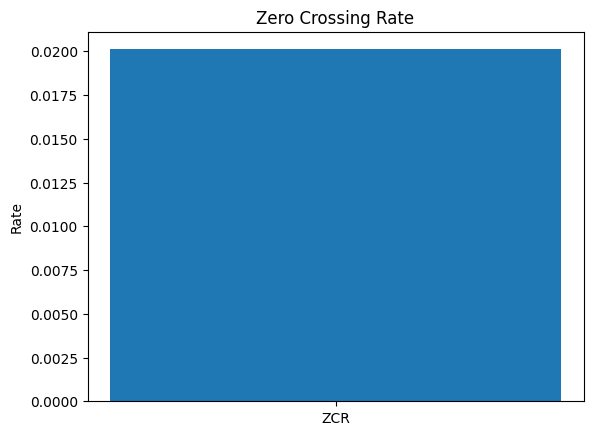

In [ ]:
zcr = np.mean(np.abs(np.diff(np.sign(signal)))) / 2

plt.figure()
plt.bar(["ZCR"], [zcr])
plt.title("Zero Crossing Rate")
plt.ylabel("Rate")
plt.show()

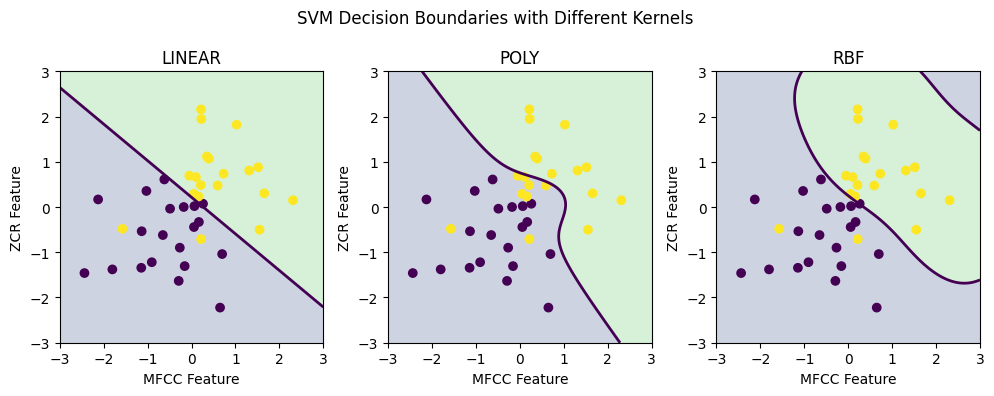

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = np.random.randn(40, 2)
y = np.array([0]*20 + [1]*20)
X[20:] += 1.5

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, ax = plt.subplots(1, 3, figsize=(10, 4))
kernels = ['linear', 'poly', 'rbf']

xx, yy = np.meshgrid(
    np.linspace(-3, 3, 200),
    np.linspace(-3, 3, 200)
)

for idx, kernel in enumerate(kernels):
    i, j = divmod(idx, 3)

    svm = SVC(kernel=kernel)
    svm.fit(X_scaled, y)

    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax[j].contourf(xx, yy, Z > 0, alpha=0.25)
    ax[j].contour(xx, yy, Z, levels=[0], linewidths=2)
    ax[j].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

    ax[j].set_title(kernel.upper())
    ax[j].set_xlabel("MFCC Feature")
    ax[j].set_ylabel("ZCR Feature")

plt.suptitle("SVM Decision Boundaries with Different Kernels")
plt.tight_layout()
plt.show()
